In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Import data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [2]:
y_train = df_train['Survived']
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [3]:
# concat all data
data = pd.concat([df_train.drop(['Survived'], axis=1), df_test])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [4]:
df_train.drop(columns=['Survived'], inplace=True)
df_train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [22]:
x_train = df_train[['Age', 'Fare', 'Pclass', 'SibSp', 'Sex']]
df_test = df_test[['Age', 'Fare', 'Pclass', 'SibSp', 'Sex']]
x_train.columns

Index(['Age', 'Fare', 'Pclass', 'SibSp', 'Sex'], dtype='object')

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder


numercial_transformer = SimpleImputer(strategy='median')


cat_transformer = OrdinalEncoder()


preprocessor = ColumnTransformer(
    transformers = [
        ("numerical", numercial_transformer, ['Age', 'Fare', 'Pclass', 'SibSp']),
        ("categorial", cat_transformer, ['Sex'])
    ]
)

model_pipe = Pipeline(
    steps = [
        ("preprocessor", preprocessor),
        ("model", tree.DecisionTreeClassifier(max_depth=3))
    ]
)

model_pipe.fit(x_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  SimpleImputer(strategy='median'),
                                                  ['Age', 'Fare', 'Pclass',
                                                   'SibSp']),
                                                 ('categorial',
                                                  OrdinalEncoder(),
                                                  ['Sex'])])),
                ('model', DecisionTreeClassifier(max_depth=3))])

In [24]:
preds = model_pipe.predict(df_test)
preds[:5]

array([0, 1, 0, 0, 1])

In [25]:
# split training data to tune hyperparam
X_train_2, X_test, y_train_2, y_test = train_test_split(
    x_train, y_train, test_size=0.33, random_state=42, stratify=y_train)

In [26]:
model_pipe.fit(X_train_2, y_train_2)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  SimpleImputer(strategy='median'),
                                                  ['Age', 'Fare', 'Pclass',
                                                   'SibSp']),
                                                 ('categorial',
                                                  OrdinalEncoder(),
                                                  ['Sex'])])),
                ('model', DecisionTreeClassifier(max_depth=3))])

In [27]:
X_train_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596 entries, 381 to 301
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     481 non-null    float64
 1   Fare    596 non-null    float64
 2   Pclass  596 non-null    int64  
 3   SibSp   596 non-null    int64  
 4   Sex     596 non-null    object 
dtypes: float64(2), int64(2), object(1)
memory usage: 27.9+ KB


In [36]:
train_score = []
test_score = []

for depth in np.arange(1, 10):
    model_pipe = Pipeline(
        steps = [
            ("preprocessor", preprocessor),
            ("model", tree.DecisionTreeClassifier(max_depth=depth))
        ]
    )   
    model_pipe.fit(X_train_2, y_train_2)
    # compute accuracy
    preds_train = model_pipe.predict(X_train_2)
    acc_train = round(((preds_train == y_train_2).sum()/len(y_train_2)) * 100, 2)
    train_score.append(acc_train)

    preds_test = model_pipe.predict(X_test)
    acc_test = round(((preds_test == y_test).sum()/len(y_test)) * 100, 2)
    test_score.append(acc_test)

train_score[:2], test_score[:2]

([78.86, 80.54], [78.31, 77.63])

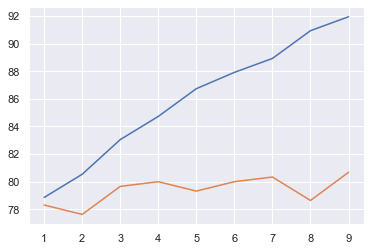

In [39]:
plt.plot(np.arange(1, 10), train_score)
plt.plot(np.arange(1, 10), test_score)

- Chooose depth of 3 before acc decreases

In [41]:

draw_tree()

NameError: name 'draw_tree' is not defined